## Тест работы espaloma_charge

In [7]:
import glob
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
import IPython.display as display
from io import BytesIO
import base64
import espaloma_charge
from espaloma_charge import charge
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdFMCS
# import param_tool as pt

In [3]:
def mol2_to_chem(path_to_mol2, sanitize=True, removeHs=False):
    rdkit_chem = Chem.MolFromMol2File(path_to_mol2, sanitize=sanitize, removeHs=removeHs)
    if rdkit_chem:
        AllChem.Compute2DCoords(rdkit_chem)
    return rdkit_chem

In [4]:
def draw_mol_with_atom_index(mol, charge_list=None, size=(600, 400)):
    """
    Добавляет номера атомов в атрибуты атомов молекулы и рисует молекулу.
    """
    if charge_list is not None and len(charge_list) == len(mol.GetAtoms()):
        for i, atom in enumerate(mol.GetAtoms()):
            atom.SetAtomMapNum(atom.GetIdx())
            atom.SetDoubleProp('PartialCharge', float(charge_list[i]))  # Преобразование в float
            atom.SetProp('atomNote', str(f"{charge_list[i]:.4f}"))
    else:
        for i, atom in enumerate(mol.GetAtoms()):
            atom.SetAtomMapNum(atom.GetIdx())

    return Draw.MolToImage(mol, size)

In [8]:
test_path_list = glob.glob('demo/*/*.mol2')

In [13]:
n=110
test_chem = mol2_to_chem(test_path_list[n])

In [18]:
name = '1lpg'
path = glob.glob(f'demo/*/{name}*.mol2')
path
test_chem = mol2_to_chem(*path)

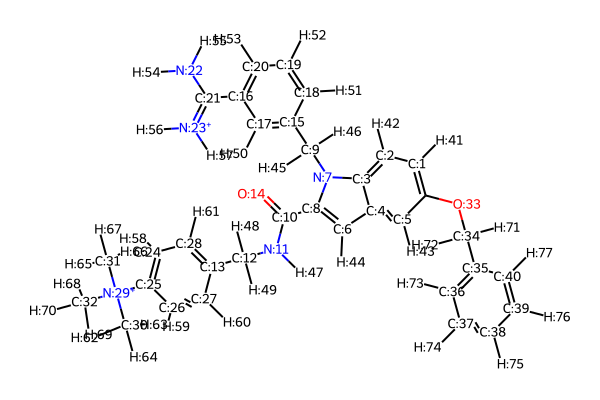

In [19]:
draw_mol_with_atom_index(test_chem)

In [20]:
charge_list = list(charge(test_chem))
print(f'{charge_list} \n {sum(charge_list)}')

[0.16430978, -0.43563142, -0.12604567, 0.15787672, -0.17351155, -0.25190726, -0.062243134, -0.3799181, -0.13958251, 0.29466018, 0.73308975, -0.45525545, 0.09326626, -0.23139712, -0.6598517, -0.26054493, -0.30853394, -0.19470572, -0.2665052, -0.19952686, -0.20964308, 0.25851652, -0.40993676, -0.41279083, -0.21059844, -0.13053769, -0.21059844, -0.27714843, -0.27714843, -0.55895287, 0.030820573, 0.030820573, 0.030820573, -0.43807712, 0.14086016, -0.21265818, -0.2420371, -0.21188916, -0.2185021, -0.21188916, -0.2420371, 0.21884179, 0.20551245, 0.21063314, 0.24800156, 0.033809055, 0.033809055, 0.32351834, 0.047898456, 0.047898456, 0.23742865, 0.21601342, 0.20998369, 0.22879767, 0.31721258, 0.31721258, 0.2041915, 0.2041915, 0.2034415, 0.2034415, 0.23159386, 0.23159386, 0.14282797, 0.14282797, 0.14282797, 0.14282797, 0.14282797, 0.14282797, 0.14282797, 0.14282797, 0.14282797, 0.07001771, 0.07001771, 0.2153761, 0.21758145, 0.21813643, 0.21758145, 0.21537611] 
 -1.0225921869277954e-06


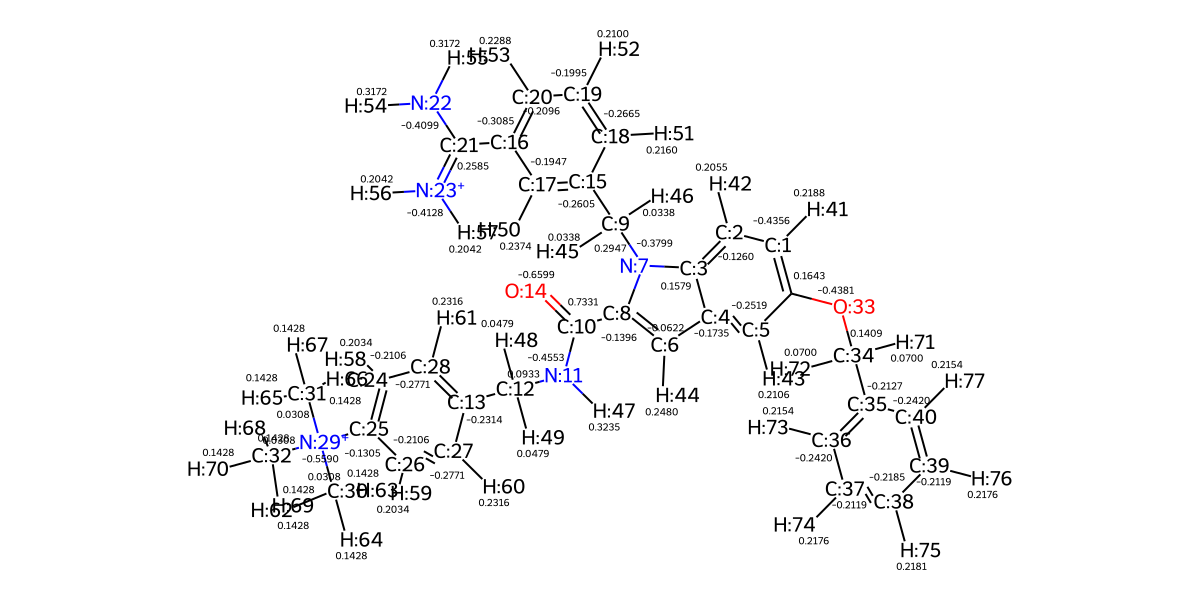

In [21]:
draw_mol_with_atom_index(test_chem, charge_list=charge_list, size=(1200,600))

In [22]:
charge_list[29]

-0.55895287

In [8]:
SMILES = "[H]N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C(=O)N([H])[C@]([H])(C([H])=O)C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[N+](C([H])([H])[H])(C([H])([H])[H])C([H])([H])[H])C([H])([H])[H]"

In [9]:
from rdkit import Chem
molecule = Chem.MolFromSmiles(SMILES)
molecule = Chem.AddHs(molecule)

In [33]:
from espaloma_charge import charge
charge_list = list(charge(molecule))
print(f'{charge_list} \n {sum(charge_list)}')

[-0.97515535, 0.019805903, 0.67799014, -0.7639928, -0.50520945, -0.0073070284, 0.6819243, -0.79268503, -0.49795267, -0.114077285, 0.6156056, -0.58183277, -0.12693505, -0.14208202, -0.15348694, -0.15814862, 0.058345005, -0.66158104, 0.0135713015, 0.0135713015, 0.0135713015, -0.1676676, 0.38024318, 0.38024318, 0.06702723, 0.30957016, 0.08905143, 0.3176582, 0.06463857, 0.020060262, 0.05143141, 0.05143141, 0.05143141, 0.07900851, 0.07900851, 0.08014975, 0.08014975, 0.08555391, 0.08555391, 0.09489557, 0.09489557, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.10083699, 0.061398327, 0.061398327, 0.061398327] 
 1.0281801223754883e-06


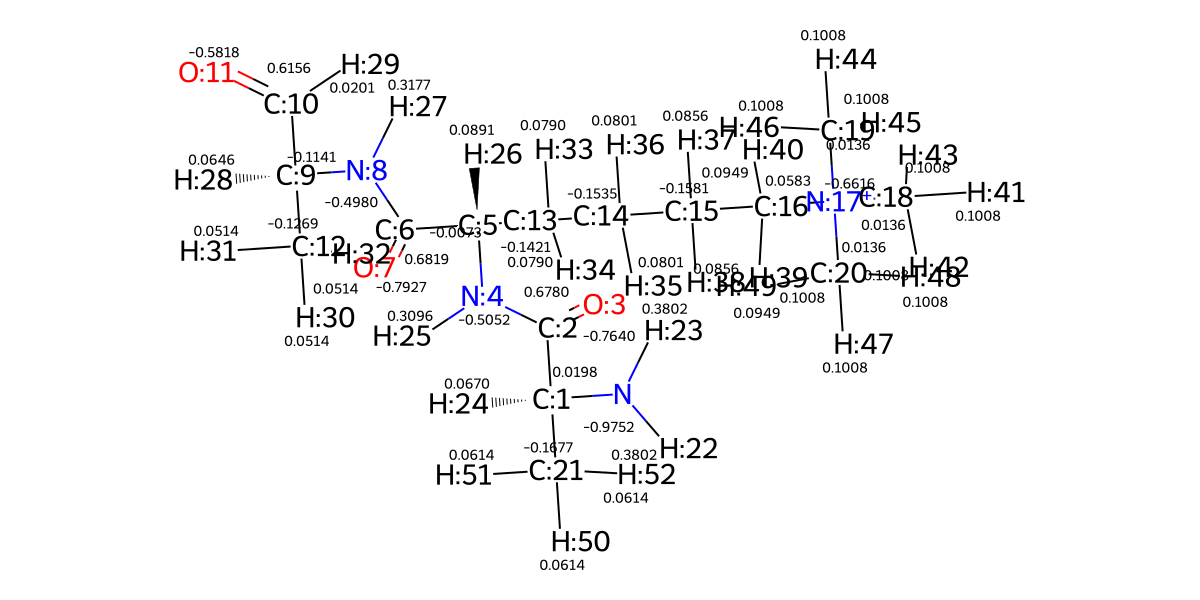

In [36]:
draw_mol_with_atom_index(molecule, charge_list=charge_list, size=(1200,600))

In [21]:
len(charge_list)

53

In [24]:
molecule.GetNumAtoms()

53

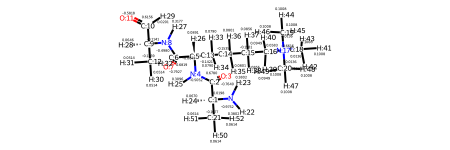

In [37]:
molecule

## Работы с QCArchive

In [1]:
import qcportal as ptl

client = ptl.PortalClient("https://qcademo.molssi.org")
print(client)

PortalClient(server_name='MolSSI QCFractal Demo Server', address='https://qcademo.molssi.org/', username='None')


In [2]:
first_record = client.get_records(1)
print(first_record)

<SinglepointRecord id=1 status=complete>


In [4]:
print(first_record.properties["scf_two_electron_energy"])

0.6644901039732637
